In [3]:
import fastf1
import fastf1.plotting
import time
import random
import numpy as np  
from matplotlib import pyplot as plt 

In [4]:
# Fast f1 is largely implemented ontop of pandas dataframes

# Get the data for a session (Monza 2019 Quali here):
session = fastf1.get_session(2019, 'Monza', 'Q')
session.load(telemetry=False, laps=False, weather=False)

req         WARNING 	DEFAULT CACHE ENABLED! (48.21 MB) /home/jude/.cache/fastf1
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '44', '77', '5', '3', '27', '55', '23', '18', '7', '99', '20', '26', '4', '10', '8', '11', '63', '88', '33']


In [5]:
# Print vettels first name (to familiarise with the data formatting)
vettel = session.get_driver('VET')
print(f"Forza {vettel['FirstName']}!")

Forza Sebastian!


core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '44', '77', '5', '3', '27', '55', '23', '18', '7', '99', '20', '26', '4', '10', '8', '11', '63', '88', '33']


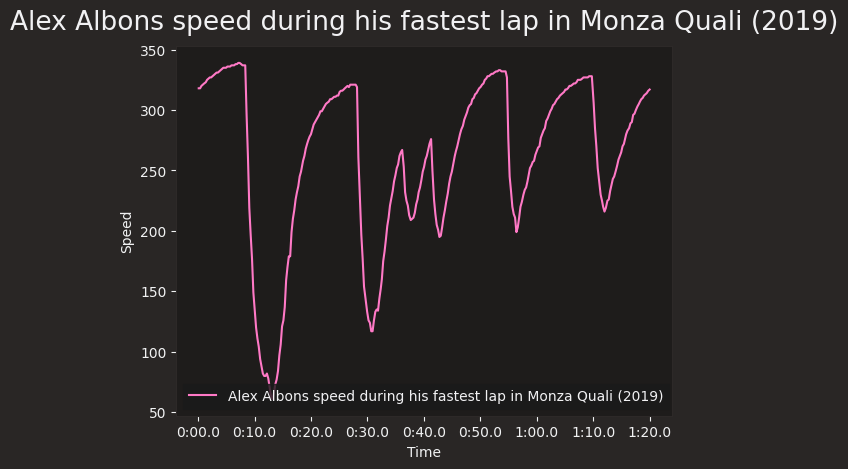

In [6]:
# Now lets plot any drivers speed during their fastest lap - im choosing albono
fastf1.plotting.setup_mpl(misc_mpl_mods=False, mpl_timedelta_support=True, color_scheme='fastf1')

# Load the session data
session.load()

# Get his fastest lap
albon_fastest_lap = session.laps.pick_drivers('ALB').pick_fastest()

# Get his car data from the fastest lap
albon_car_data = albon_fastest_lap.get_car_data()
time = albon_car_data["Time"]
vCar = albon_car_data["Speed"]

fig, ax = plt.subplots()
ax.plot(time, vCar, label="Alex Albons speed during his fastest lap in Monza Quali (2019)")
ax.set_xlabel("Time")
ax.set_ylabel("Speed")
ax.set_title("Alex Albons speed during his fastest lap in Monza Quali (2019)")
ax.legend()
plt.show()



core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 

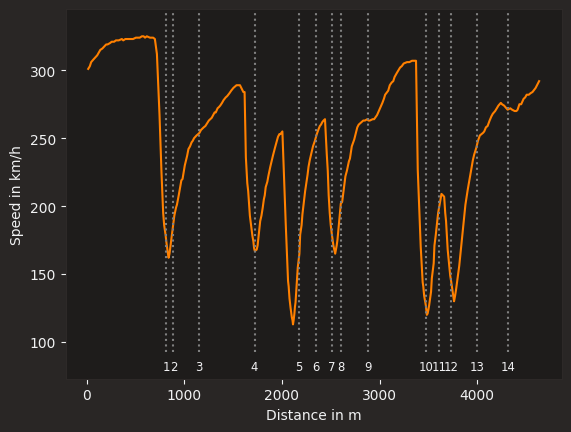

In [13]:
# Now lets plot the speed, annotating it with the corners of the circuit

# Lets use the spanish gp
session = fastf1.get_session(2024, "Spanish Grand Prix", "Q")
session.load()

# Get the fastest lap from the session
fastest_lap = session.laps.pick_fastest()
car_data = fastest_lap.get_car_data().add_distance()

# Get the circuit info (has info about the corners)
circuit_info = session.get_circuit_info()

team_colour = fastf1.plotting.get_team_color(fastest_lap["Team"], session=session)

fig, ax = plt.subplots()
ax.plot(car_data['Distance'], car_data['Speed'], color=team_colour, label=fastest_lap['Driver'])

# Draw vertical dotted lines at each corner that range between slightly below min speed and slightly above max speed
v_min = car_data['Speed'].min()
v_max = car_data['Speed'].max()
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20, linestyles='dotted', colors='grey')

# Plot the corner/turn number below each vertical line
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner["Number"]}{corner["Letter"]}"
    ax.text(corner["Distance"], v_min-30, txt, va="center_baseline", ha="center", size="small")

ax.set_xlabel("Distance in m")
ax.set_ylabel("Speed in km/h")

ax.set_ylim([v_min - 40, v_max + 20])

plt.show()